<a href="https://colab.research.google.com/github/deNzik3/portfolio/blob/main/python/covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [3]:
df = pd.read_csv('/content/covid_worldwide.csv')

In [5]:
df.head()

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
0,1,USA,"104,196,861","1,132,935","101,322,779","1,741,147","1,159,832,679","334,805,269"
1,2,India,"44,682,784","530,740","44,150,289","1,755","915,265,788","1,406,631,776"
2,3,France,"39,524,311","164,233","39,264,546","95,532","271,490,188","65,584,518"
3,4,Germany,"37,779,833","165,711","37,398,100","216,022","122,332,384","83,883,596"
4,5,Brazil,"36,824,580","697,074","35,919,372","208,134","63,776,166","215,353,593"


In [7]:
df.isna().sum()

Serial Number       0
Country             0
Total Cases         0
Total Deaths        6
Total Recovered    21
Active Cases       19
Total Test         18
Population          3
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   serial number    231 non-null    int64 
 1   country          231 non-null    object
 2   total cases      231 non-null    object
 3   total deaths     225 non-null    object
 4   total recovered  210 non-null    object
 5   active cases     212 non-null    object
 6   total test       213 non-null    object
 7   population       228 non-null    object
dtypes: int64(1), object(7)
memory usage: 14.6+ KB


In [11]:
df.columns = df.columns.str.lower()

In [15]:
df.head()

,serial number,country,total cases,total deaths,total recovered,active cases,total test,population
0,1,USA,104196861,1132935,101322779,1741147,1159832679,334805269
1,2,India,44682784,530740,44150289,1755,915265788,1406631776
2,3,France,39524311,164233,39264546,95532,271490188,65584518
3,4,Germany,37779833,165711,37398100,216022,122332384,83883596
4,5,Brazil,36824580,697074,35919372,208134,63776166,215353593


In [16]:
df['total cases'] = df['total cases'].str.replace(',','')
df['total deaths'] = df['total deaths'].str.replace(',','')
df['total recovered'] = df['total recovered'].str.replace(',','')
df['active cases'] = df['active cases'].str.replace(',','')
df['total test'] = df['total test'].str.replace(',','')
df['population'] = df['population'].str.replace(',','')

In [20]:
df['total cases'] = df['total cases'].astype('int64')
df['total deaths'] = df['total deaths'].astype('float64')
df['total recovered'] = df['total recovered'].astype('float64')
df['active cases'] = df['active cases'].astype('float64')
df['total test'] = df['total test'].astype('float64')
df['population'] = df['population'].astype('float64')


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   serial number    231 non-null    int64  
 1   country          231 non-null    object 
 2   total cases      231 non-null    int64  
 3   total deaths     225 non-null    float64
 4   total recovered  210 non-null    float64
 5   active cases     212 non-null    float64
 6   total test       213 non-null    float64
 7   population       228 non-null    float64
dtypes: float64(5), int64(2), object(1)
memory usage: 14.6+ KB


In [47]:
df.country.value_counts().head(15)

USA                 1
Mauritania          1
Bhutan              1
Syria               1
Burundi             1
Seychelles          1
Gabon               1
Andorra             1
Papua New Guinea    1
Curaçao             1
Aruba               1
Tanzania            1
Mayotte             1
Mauritius           1
Togo                1
Name: country, dtype: int64

In [48]:
sns.set_style('darkgrid')
data = df['total recovered'] / df['total cases'] * 100 
data.head(15)
sns.bra

AttributeError: ignored

In [53]:
data = df[['country','total recovered','total cases']] 
data

,country,total recovered,total cases
0,USA,101322779.0,104196861
1,India,44150289.0,44682784
2,France,39264546.0,39524311
3,Germany,37398100.0,37779833
4,Brazil,35919372.0,36824580
...,...,...,...
226,Diamond Princess,699.0,712
227,Vatican City,29.0,29
228,Western Sahara,9.0,10
229,MS Zaandam,7.0,9


In [55]:
data['pcnt'] = data['total recovered'] / data['total cases'] * 100

<ipython-input-55-9a1afef11c53>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['pcnt'] = data['total recovered'] / data['total cases'] * 100


In [60]:
data.head(15)

,country,total recovered,total cases,pcnt
0,USA,101322779.0,104196861,97.241681
1,India,44150289.0,44682784,98.808277
2,France,39264546.0,39524311,99.342772
3,Germany,37398100.0,37779833,98.989585
4,Brazil,35919372.0,36824580,97.541838
5,Japan,21567425.0,32588442,66.181209
6,S. Korea,29740877.0,30197066,98.489294
7,Italy,25014986.0,25453789,98.276080
8,UK,24020088.0,24274361,98.952504
9,Russia,21356008.0,21958696,97.255356


In [76]:
data = data.head(15)
data = data.sort_values(by = 'pcnt', ascending = False)
data['pcnt'] = data['pcnt'].round(2)
data

,country,total recovered,total cases,pcnt
13,Australia,11235771.0,11295446,99.0
2,France,39264546.0,39524311,99.0
3,Germany,37398100.0,37779833,99.0
8,UK,24020088.0,24274361,99.0
1,India,44150289.0,44682784,99.0
11,Spain,13557699.0,13731478,99.0
6,S. Korea,29740877.0,30197066,98.0
14,Argentina,9877032.0,10037135,98.0
7,Italy,25014986.0,25453789,98.0
4,Brazil,35919372.0,36824580,98.0


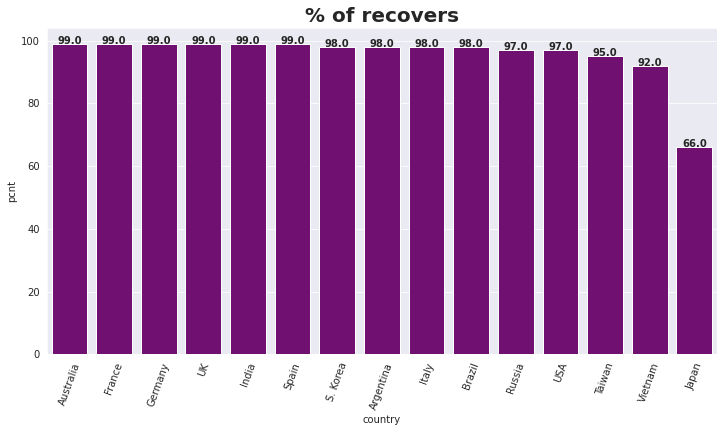

In [83]:
plt.figure(figsize = (12,6))
plt.xticks(rotation = 70)
plt.title('% of recovers', weight = 'heavy',fontsize =20)
sns.barplot(data = data, x = 'country', y = 'pcnt',color = 'purple')
for i,v in enumerate(data['pcnt']):
  plt.text(i,v,str(v),ha = 'center',weight = 'bold', size = 10)


In [87]:
data = df[['country','total deaths','total cases', 'active cases', 'population']]

In [92]:
data.head(20)
data['pcnt of deaths'] = df['total deaths'] / df['total cases'] * 100

<ipython-input-92-9cb33155e1dc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['pcnt of deaths'] = df['total deaths'] / df['total cases'] * 100


In [101]:
data['pcnt of deaths'] = data['pcnt of deaths'].round(2)
data = data.sort_values(by = 'pcnt of deaths',ascending = False)
da = data.head(20)

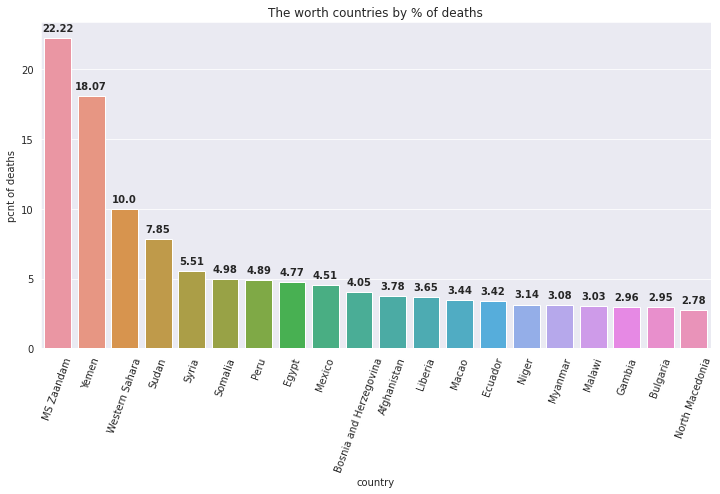

In [127]:
plt.figure(figsize = (12,6))
plt.title('The worth countries by % of deaths')
plt.xticks(rotation = 70)
sns.barplot(data = da, x = 'country', y = 'pcnt of deaths')
for i,v in enumerate(da['pcnt of deaths']):
  plt.text(i,v + 0.5,str(v), ha = 'center', weight = 'bold')

In [111]:
data[data['total deaths'] == data['total deaths'].max()]

,country,total deaths,total cases,active cases,population,pcnt of deaths
0,USA,1132935.0,104196861,1741147.0,334805269.0,1.09


In [113]:
df

,serial number,country,total cases,total deaths,total recovered,active cases,total test,population
0,1,USA,104196861,1132935.0,101322779.0,1741147.0,1.159833e+09,3.348053e+08
1,2,India,44682784,530740.0,44150289.0,1755.0,9.152658e+08,1.406632e+09
2,3,France,39524311,164233.0,39264546.0,95532.0,2.714902e+08,6.558452e+07
3,4,Germany,37779833,165711.0,37398100.0,216022.0,1.223324e+08,8.388360e+07
4,5,Brazil,36824580,697074.0,35919372.0,208134.0,6.377617e+07,2.153536e+08
...,...,...,...,...,...,...,...,...
226,227,Diamond Princess,712,13.0,699.0,0.0,NaN,NaN
227,228,Vatican City,29,NaN,29.0,0.0,NaN,7.990000e+02
228,229,Western Sahara,10,1.0,9.0,0.0,NaN,6.261610e+05
229,230,MS Zaandam,9,2.0,7.0,0.0,NaN,NaN


In [115]:
data['total recovered'] = df['total recovered']

In [122]:
data = data.sort_values(by = 'total deaths',ascending = False)

In [125]:
data['pcnt'] = data['total cases'] / data['population'] * 100

In [137]:
da = data.sort_values(by = 'pcnt', ascending = False)
da = da.head(20)
da['pcnt'] = da['pcnt'].round(2)

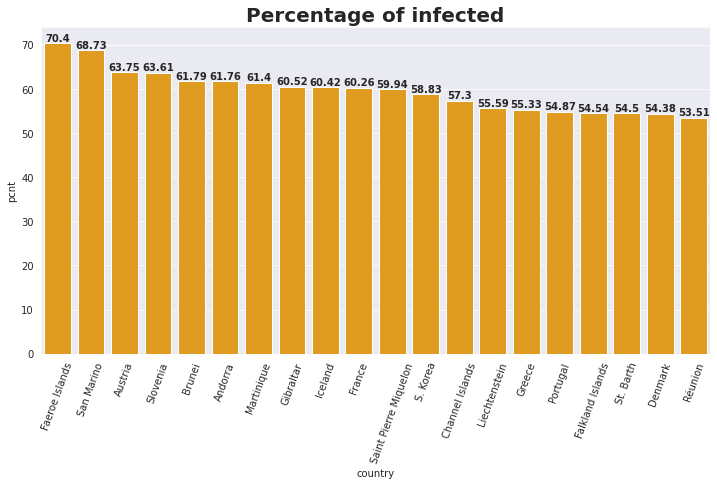

In [142]:
plt.figure(figsize = (12,6))
plt.title('Percentage of infected',fontsize = 20, weight = 'heavy')
plt.xticks(rotation = 70)

sns.barplot(data = da, x = 'country', y = 'pcnt',color = 'orange')
for i,v in enumerate(da['pcnt']):
  plt.text(i,v + 0.5,str(v), ha = 'center', weight = 'bold',size = 10)

In [146]:
data['pcnt'] = data['pcnt'].round(2)
data['pcnt'].mean()

19.532587719298245

In [169]:
data = data.sort_values(by = 'active cases', ascending = False)
daq = data.head(8)
daq

,country,total deaths,total cases,active cases,population,pcnt of deaths,total recovered,pcnt
5,Japan,68399.0,32588442,10952618.0,125584838.0,0.21,21567425.0,25.95
0,USA,1132935.0,104196861,1741147.0,334805269.0,1.09,101322779.0,31.12
20,Poland,118736.0,6380225,925549.0,37739785.0,1.86,5335940.0,16.91
12,Vietnam,43186.0,11526508,870843.0,98953541.0,0.37,10612479.0,11.65
18,Mexico,332198.0,7368252,429421.0,131562772.0,4.51,6606633.0,5.60
15,Taiwan,16356.0,9569611,423489.0,23888595.0,0.17,9129766.0,40.06
6,S. Korea,33486.0,30197066,422703.0,51329899.0,0.11,29740877.0,58.83
40,Hong Kong,13358.0,2877280,354439.0,7604299.0,0.46,2509483.0,37.84


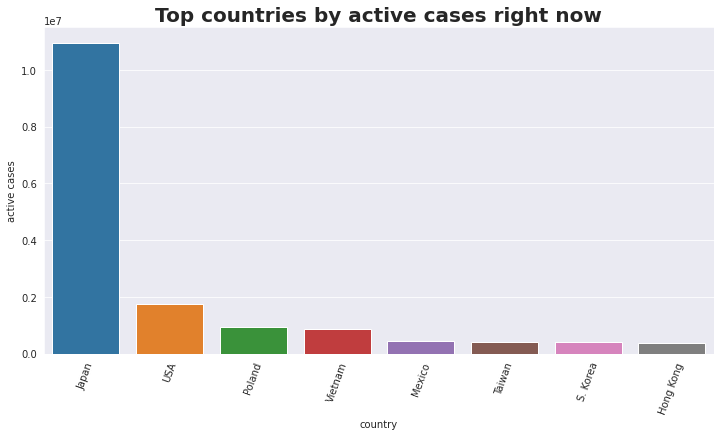

In [171]:
plt.figure(figsize = (12,6))
plt.title('Top countries by active cases right now', weight = 'heavy',fontsize = 20)
plt.xticks(rotation = 70)
sns.barplot(data = daq, x = 'country', y = 'active cases')


In [172]:
data

,country,total deaths,total cases,active cases,population,pcnt of deaths,total recovered,pcnt
5,Japan,68399.0,32588442,10952618.0,125584838.0,0.21,21567425.0,25.95
0,USA,1132935.0,104196861,1741147.0,334805269.0,1.09,101322779.0,31.12
20,Poland,118736.0,6380225,925549.0,37739785.0,1.86,5335940.0,16.91
12,Vietnam,43186.0,11526508,870843.0,98953541.0,0.37,10612479.0,11.65
18,Mexico,332198.0,7368252,429421.0,131562772.0,4.51,6606633.0,5.60
...,...,...,...,...,...,...,...,...
161,Isle of Man,116.0,38008,NaN,85732.0,0.31,NaN,44.33
208,British Virgin Islands,64.0,7305,NaN,30596.0,0.88,NaN,23.88
175,Micronesia,58.0,22676,NaN,117489.0,0.26,NaN,19.30
164,Faeroe Islands,28.0,34658,NaN,49233.0,0.08,NaN,70.40
